# Indian Crop Dataset analysis and crop prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset and create dataframe

In [3]:
data = pd.read_csv('indiancrop_dataset.csv')
df = pd.DataFrame(data)

In [4]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [5]:
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [6]:
df.tail()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,West Bengal,1400,Coffee


In [7]:
print("The dataset has rows and columns: ",df.shape)

The dataset has rows and columns:  (2200, 10)


In [8]:
print("Unique crops present in the dataset: ",df['CROP'].unique())

Unique crops present in the dataset:  ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']


In [9]:
print("Number of total unique crops present in the dataset: ",df['CROP'].nunique())

Number of total unique crops present in the dataset:  22


COLUMNS AND THEIR DATATYPES

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


STATISTICS OF THE WHOLE DATASET

In [11]:
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


## Data Visualization 

### Soil Nutrients vs Crop price

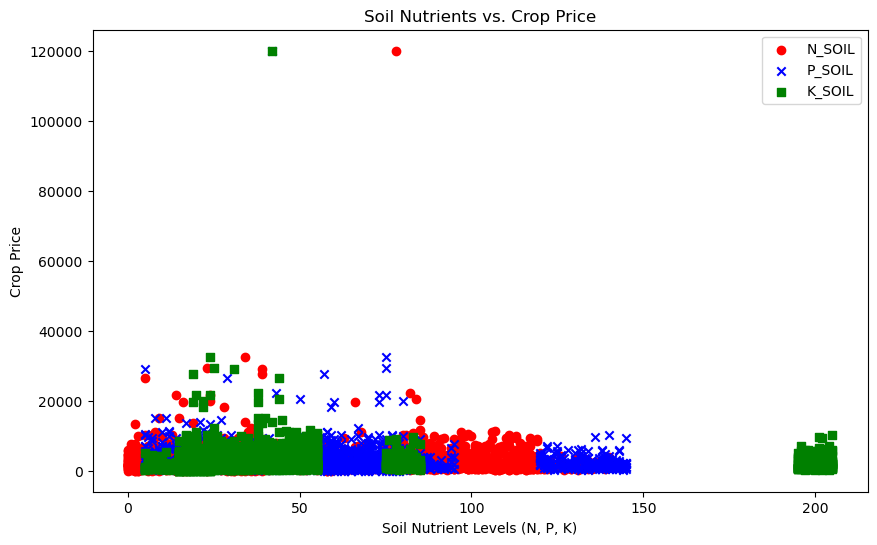

In [12]:
# Scatter plot for N, P, K Soil vs Crop Price
plt.figure(figsize=(10, 6))
plt.scatter(df['N_SOIL'], df['CROP_PRICE'], label='N_SOIL', color='red', marker='o')
plt.scatter(df['P_SOIL'], df['CROP_PRICE'], label='P_SOIL', color='blue', marker='x')
plt.scatter(df['K_SOIL'], df['CROP_PRICE'], label='K_SOIL', color='green', marker='s')
plt.xlabel('Soil Nutrient Levels (N, P, K)')
plt.ylabel('Crop Price')
plt.title('Soil Nutrients vs. Crop Price')
plt.legend()
plt.show()

### Soil pH level distribution

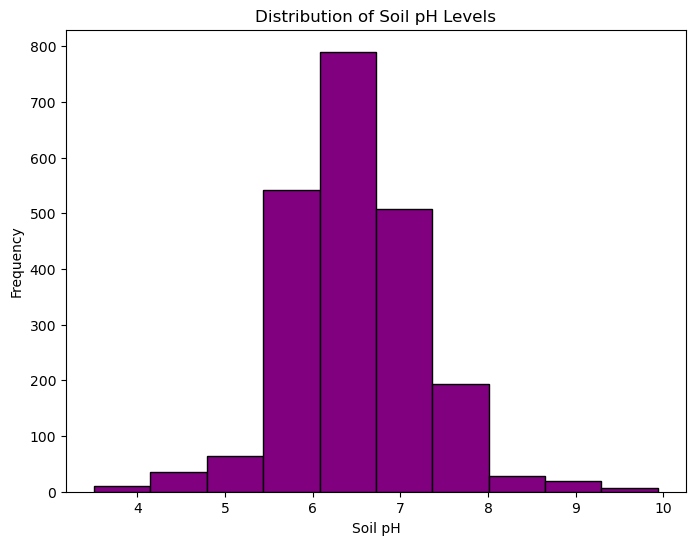

In [13]:
# Histogram for pH levels
plt.figure(figsize=(8, 6))
plt.hist(df['ph'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Soil pH')
plt.ylabel('Frequency')
plt.title('Distribution of Soil pH Levels')
plt.show()

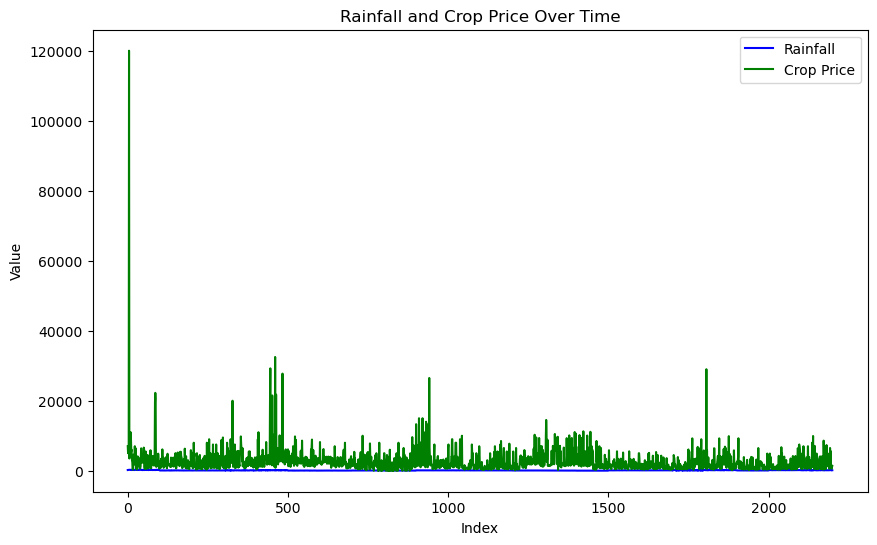

In [14]:
# Line plot for Rainfall and Crop Price
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['RAINFALL'], label='Rainfall', color='blue')
plt.plot(df.index, df['CROP_PRICE'], label='Crop Price', color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Rainfall and Crop Price Over Time')
plt.legend()
plt.show()


### Frequency of different crops

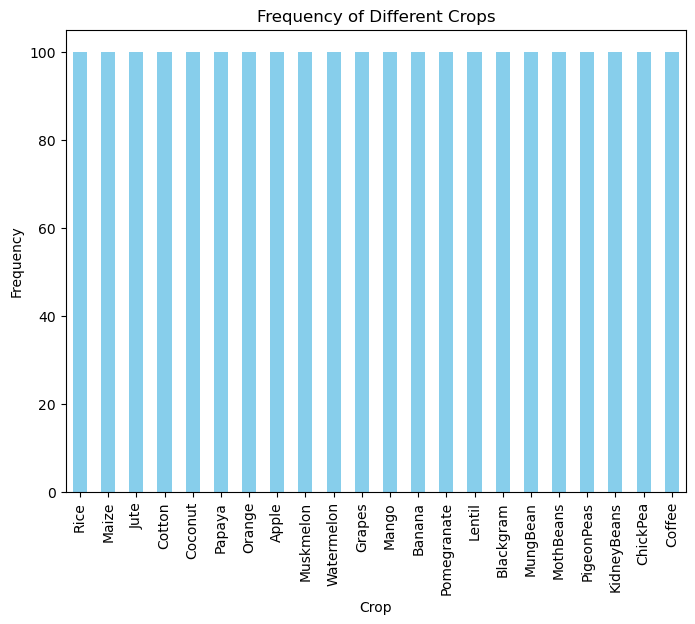

In [15]:
# Count the frequency of each crop
crop_counts = df['CROP'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
crop_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Frequency')
plt.title('Frequency of Different Crops')
plt.show()

### Box plots for different columns like crop price, soil nutients (N,K,P) for showing median, quartiles and potential outliers

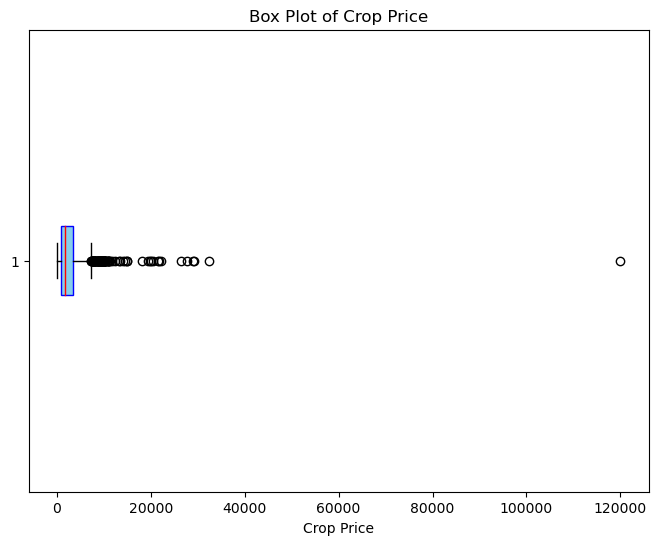

In [16]:
# Create the box plot for Crop Price
plt.figure(figsize=(8, 6))
plt.boxplot(df['CROP_PRICE'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'), 
            medianprops=dict(color='red'))
plt.xlabel('Crop Price')
plt.title('Box Plot of Crop Price')
plt.show()

In [17]:
df[df['CROP_PRICE']==120000]
#this is the max crop_price

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
4,78,42,42,20.130175,81.604873,7.628473,262.71734,Andaman and Nicobar,120000,Rice


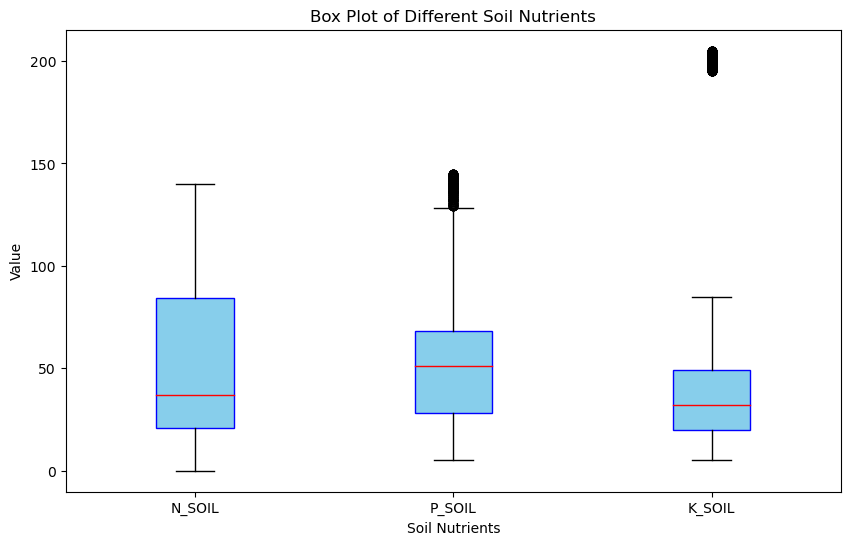

In [18]:
# Create a box plot for each soil nutrient
plt.figure(figsize=(10, 6))
plt.boxplot([df['N_SOIL'], df['P_SOIL'], df['K_SOIL']], 
            labels=['N_SOIL', 'P_SOIL', 'K_SOIL'], patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'))
plt.xlabel('Soil Nutrients')
plt.ylabel('Value')
plt.title('Box Plot of Different Soil Nutrients')
plt.show()

c:\Users\shiva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


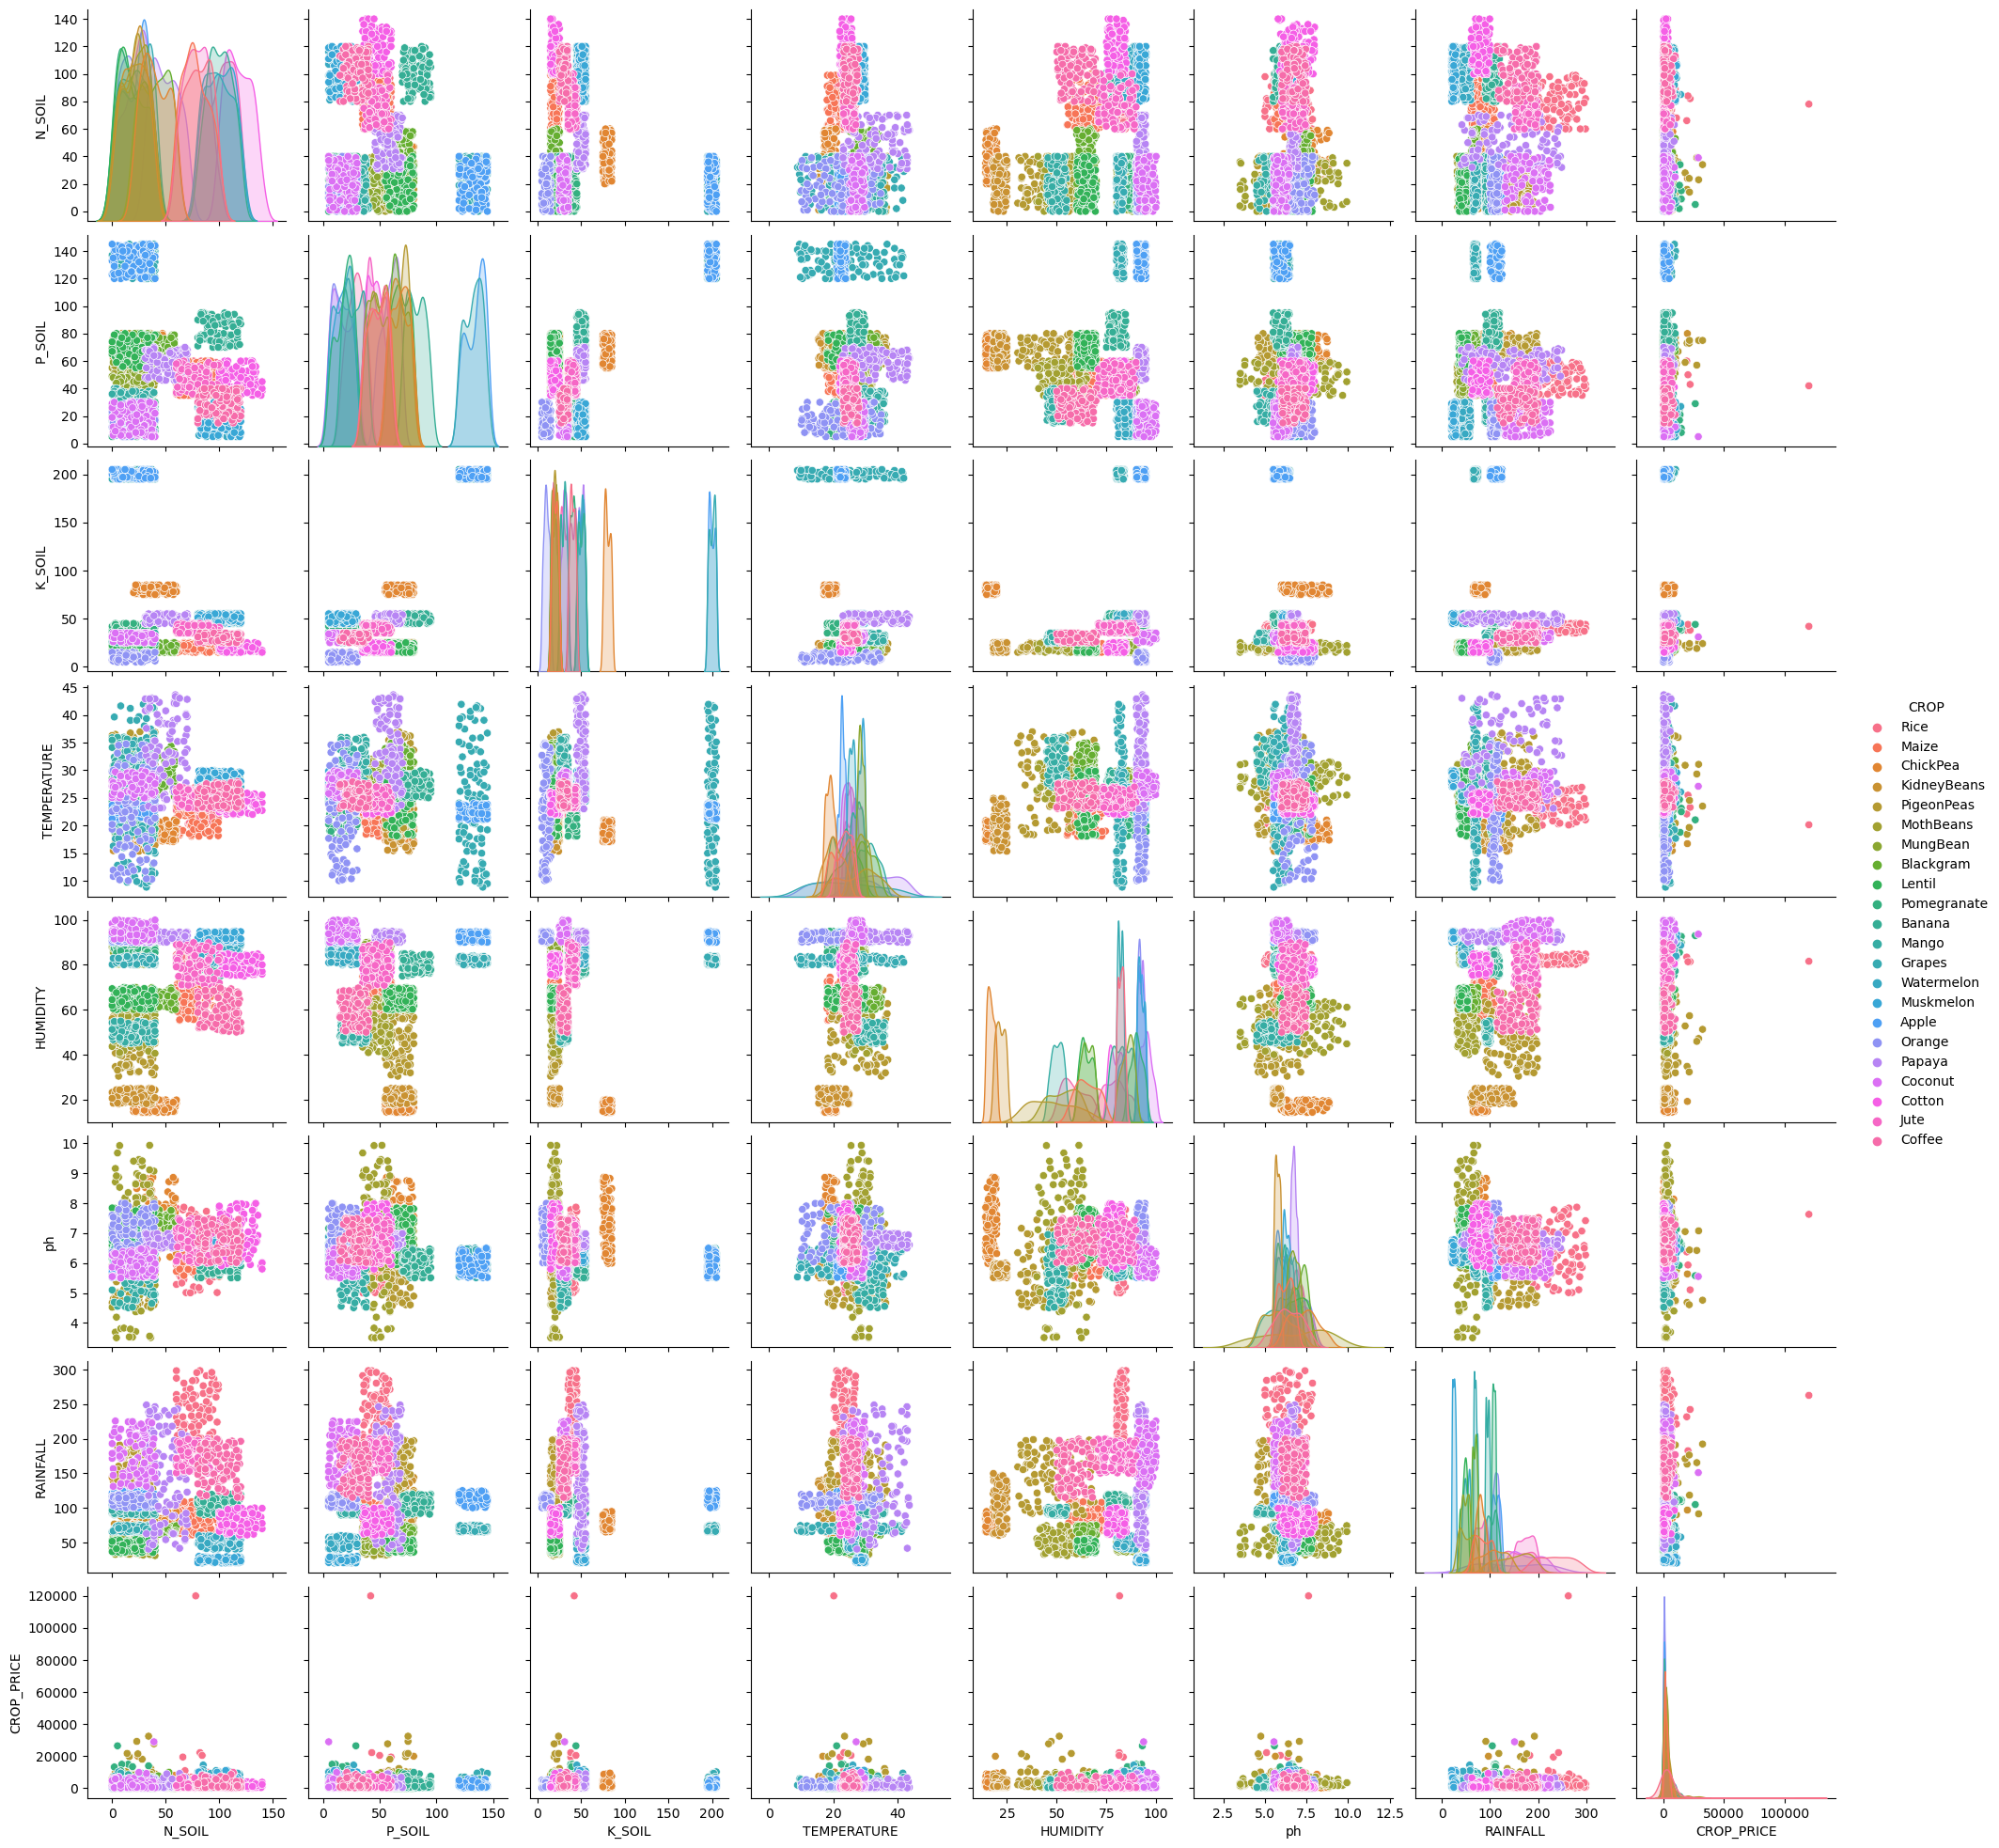

In [19]:
import seaborn as sns
sns.pairplot(df,hue = 'CROP')

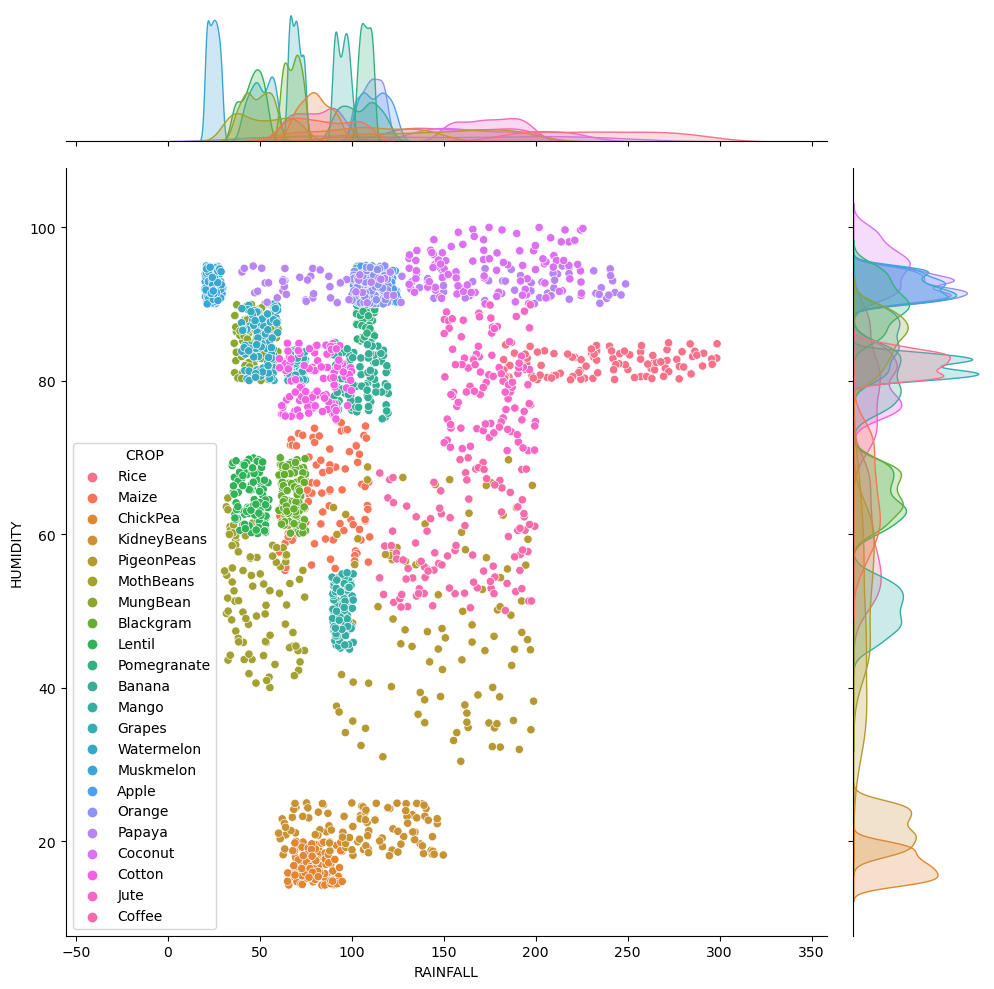

In [20]:
sns.jointplot(x="RAINFALL",y="HUMIDITY",data=df,height=10,hue="CROP")

### Correlation Matrix

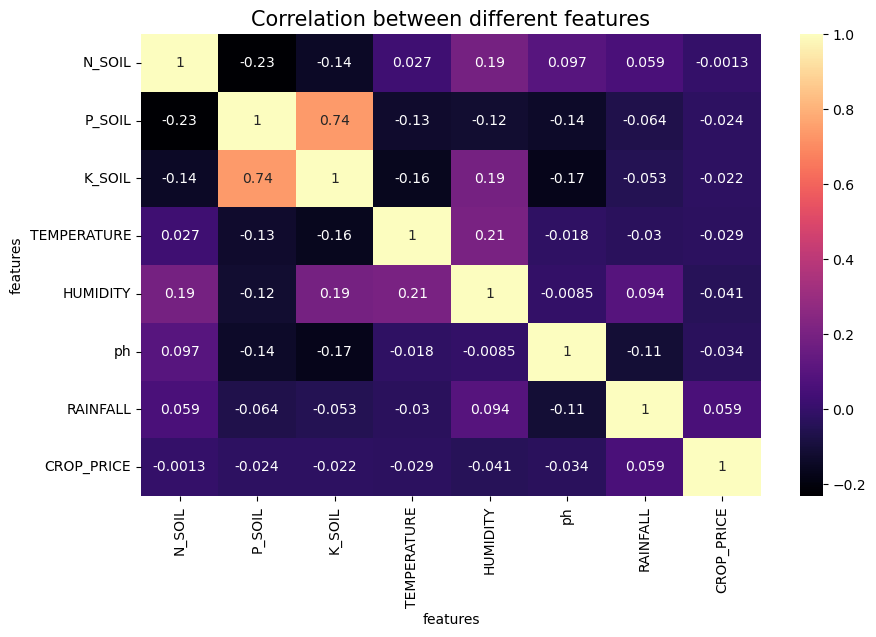

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True,cmap='magma')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()